In [1]:
from input import *
calc = True

# Vorgespannter Träger

Nachdem das @sec-verifizierung die Anwendbarkeit des Modells bestätigt hat, wird in diesem Kapitel ein Versuch eines vorgespannten Trägers mittels dem Federmodell nachgerechnet. Es wird die Bestimmung der Momenten-Krümmungs-Beziehung aufgezeigt. Auf das Versatzmass und auf die Schubverformungen wird nicht eingegangen. Abschliessend werden die Versuchsresultate mit den berechneten Grössen verglichen und kommentiert.

## Versuchsbeschrieb
Der vorgespannte Träger T6 ist im Versuchsbericht @sigrist_versuche_1993 aufgezeigt. Es handelt sich um einen einfachen Balken mit einer Auskragung. Die Geometrie des Versuchs in Längsrichtung ist in @fig-geometrie_t6 gezeigt. 

![Geometrie des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_laengs.svg){#fig-geometrie_t6}

Der dazugehörige Querschnitt ist in @fig-geometrie_qs_t6 gezeigt.

![Geometrie des Querschnitts des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_geometrie_qs.svg){#fig-geometrie_qs_t6}

Die Lastsituation zeigt die @fig-last_t6. Am Ende des Kragarms greift eine Einzellast $P$ an. Mit $Q$ wird eine Streckenlast simuliert. Der Träger ist an den Punkten $A$ und $B$ gelenkig gelagert. Zusätzlich ist der Träger beim Auflager $B$ horizontal gehalten. 

![Lagerung und Laststellung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_last_laengs.svg){#fig-last_t6}

Die verlegte schlaffe Bewehrung ist in der @fig-bewehrung_laengs_t6 gezeigt. Diese ist an mehreren Punkten abgestuft. Die Stosslänge beträgt jeweils $60$ cm. Mit Grossbuchstaben $A$ bis $I$ sind die Bewehrungslagen in längsrichtung beschrieben. Die Schubbügel sind mit den Kleinbuchstaben $i$ bis $iii$ bezeichnet.

![Bewehrungslayout in Längsrichtung des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_laengs.svg){#fig-bewehrung_laengs_t6}

Das Bewehrungslayout im Querschnitt zeigt die @fig-bewehrung_qs_t6. Die Bewehrungsüberdeckung beträgt in allen Richtungen $20$ mm.

![Bewehrungslayout im Querschnitt des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_bewehrung_qs.svg){#fig-bewehrung_qs_t6}

Die Führung der Vorspannung ist in der @fig-vorspannung_t6 gezeigt. Das Kabel konnte im Mittel bis auf $730$ kN vorgespannt werden. Das Spannkabel besteht aus 4 Litzen mit Durchmesser $0.6''$. Eingelegt sind diese in ein Stahlhüllrohr, welches nachträglich ausinjiziert wurde.

![Vorspannungslayout des Versuchsträgers T6. Horizontaler Abstand [m] und vertikale Position [mm], gemessen von der Unterkante des Trägers, entnommen aus @sigrist_versuche_1993](../imgs/T6_vorspannung_laengs.svg){#fig-vorspannung_t6}




### Parameter

In diesem Abschnitt werden die allgemein verwendeten Parameter aufgelistet. Gegliedert nach den einzelnen Aspekten des Versuchs.

#### Vorspannung


Der folgende Abschnitt charakterisiert die Vorspannung. Aufgezeigt ist die mittlere initiale Vorspannkraft, die Fliessgrenze der Litzen, sowie deren Zugfestigkeit und entprechende Bruchdehnung. Ebenfalls dargestellt ist der Elasitzitätsmodul, die Querschnittsfläche des Spannglieds und der angewendete Verlustfaktor.

![Spannungs-Dehnungs-Diagramm mittels Zugproben ermittelt für den Spannstahl](../imgs/t6_spannstahl.svg){#fig-sigma_eps_spannstahl}

In [2]:
%%render  params
f_py = (1706 *N/mm**2)
f_pt = (1855*N/mm**2)
V_om = (730*kN)
A_p = 596*mm**2
E_p = 190000*N/mm**2
epsilon_pu = 1.50*percent

eta = 0.9 #Verlustfaktor


<IPython.core.display.Latex object>

Der Verlustfaktor wird ohne Berücksichtigung von Langzeiteffekten auf 90% geschätzt. Daras resultiert die Vorspannkraft zu:

In [3]:
%%render symbolic

P_infty = eta * V_om


<IPython.core.display.Latex object>

In [4]:

%%render params

P_infty


<IPython.core.display.Latex object>

Die Spannung im Spannglied aufgrund der Vorspannung defniert sich zu:

In [5]:
%%render symbolic

sigma_P_infty = P_infty / A_p


<IPython.core.display.Latex object>

In [6]:
%%render params

sigma_P_infty = sigma_P_infty.to(N/mm**2)


<IPython.core.display.Latex object>

Wird nun das Spannungs-Dehnungs-Verhalten des Spannstahls betrachtet, so ist ersichtlich, dass durch die Vorspannung die Spannlitzen noch nicht ausgeschöpft sind. Dargestellt ist dies in der @fig-ausnutzung_sigma_p. Unter dieser Voraussetzung beteiligt sich das Vorspannkabel ebenfalls am Abtrag der Biegemomente, bzw. fliesst in die Momenten-Krümmungs-Beziehung mit ein.

C:\Users\Pascal Gitz\AppData\Local\Temp\ipykernel_74304\3654365257.py:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  epsilon_p = np.array([0, f_py / E_p, epsilon_pu])
c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\matplotlib\cbook.py:1072: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asanyarray(x)


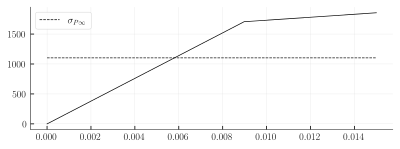

In [7]:
# | label: fig-ausnutzung_sigma_p
# | fig-cap: "Spannungs-Dehnungs-Beziehung der Spannlitzen mit ergänzter Ausnutzung durch die Vorspannung"


sigma_p = np.array([0, f_py.magnitude, f_pt.magnitude])
epsilon_p = np.array([0, f_py / E_p, epsilon_pu])

plt.plot(epsilon_p, sigma_p, color='black')
plt.hlines(sigma_P_infty.magnitude, 0, epsilon_pu, label='$\sigma_{P\infty}$', colors='black', linestyles='dashed')
plt.legend()
plt.show()

#### Beton

Die Parameter sind Mittelwerte aus Betonwürfel- und Betonzylinderproben. Entnommen aus dem Versuchsbericht @sigrist_versuche_1993. In der @fig-sigma_eps_beton ist das Spannungs-Dehnungs-Verhalten der Betonproben aufgezeigt.

![Spannungs-Dehnungs-Diagramm für den Beton, dargestellt sind diese für die Versuchskörper $T_1$ bis $T_6$](../imgs/t6_beton.svg){#fig-sigma_eps_beton}

Dabei beschreibt $f_c$ die maximale Druckfestigkeit.

In [8]:
%%render params 2

f_c = 52.1 *N/mm**2
f_cts = 4.3 *N/mm**2
E_c = 50200 *N/mm**2
rho_c = 2409 *kg/m**3
epsilon_cu = (3.5/1000*los).to(percent)

<IPython.core.display.Latex object>

#### Betonstahl

Die dargestellten Parameter sind Mittelwerte aus den durchgeführten Zugproben. Diese sind ebenfalls aus dem Versuchsbericht @sigrist_versuche_1993 entnommen. 

![Spannungs-Dehnungs-Diagramm und Kraft-Verformungs-Diagramm mittels Zugproben ermittelt für den Betonstahl](../imgs/t6_betonstahl.svg){#fig-sigma_eps_betonstahl}

Die @fig-sigma_eps_betonstahl zeigt das Spannungs-Dehnungs-Verhalten, sowie das Kraft-Verformungs-Verhalten der Probe eines Durchmesser $16$ mm Stabs. Im Spannungs-Dehnungs-Diagramm ist lediglich das Fliessplateau dargestellt. 

In [9]:
%%render params 
f_sy = 500*(MPa)
f_st = 630*(MPa)
epsilon_su = (127/1000*los).to(percent)
E_s = 205000*N/mm**2

<IPython.core.display.Latex object>

#### Geometrie

Die Parameter der Geometrie des Querschnitts beziehen sich auf die @fig-geometrie_qs_t6. Der Schwerpunkt $S_z$ des Querschnitts ist von der Unterkante aus gemessen.

In [10]:
expr_1 = sp.sympify("800*140*140/2 +30*290/2 *(140+10)*2  +30*220*155 + 400*220 *(170+200) +50*90/2 *(2/3*50+570) + 220*50*(570+25)+180*400*710")
expr_2 = sp.sympify("800*140+220*30+30*290+400*220+50*90+50*220+400*180")



In [11]:
%%render params

h_1 = 180*mm
h_2 = 50*mm
h_3 = 400*mm
h_4 = 30*mm
h_5 = 140*mm
h = 800*mm

b_1_inf = 90*mm
b_2_inf = 220*mm
b_3_inf = 90*mm

b_inf = 400*mm
b_sup = 800*mm

S_z =h - (expr_1 /expr_2).evalf(5)*mm

L = 13600*mm

<IPython.core.display.Latex object>

### Versuchsergebnisse

Der Versuchsbeschrieb wird mit den gemessenen Resultate abgeschlossen. Die @fig-durchbiegung_laengs_t6 zeigt den Verformungsverlauf für den gesamten Träger für die entsprechenden Laststufen.


![Verformungsverlauf des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegung_laengs.svg){#fig-durchbiegung_laengs_t6}





Die @fig-durchbiegung_t6 zeigt oben links das Kraft-Verformungs-Diagramm für die Einzellast $P$ mit der gemessenen Verformung $w_{10}$ an der Stelle $10$, gemäss der @fig-messstellen_t6. Oben rechts ist das Kraft-Verformungs-Diagramm für die simulierte Streckenlast $Q$ und die Verformung $w_18$ aufgezeigt. 

![Messstellen des Trägers T6, entnommen aus @sigrist_versuche_1993](../imgs/t6_messstellen.svg){#fig-messstellen_t6}

Das Diagramm unten links gibt Aufschluss über den Belastungshergang. Zunächst wird die Einzelllast $P$ gesteigert bis ca. $480$ kN. Ab dieser Stufe wurde die Einzellast konstant gehalten, die Streckenlast $Q$ wurde abschliessend erhöht, bis der Träger versagte. Das Versagen geschah schlagartig, durch das Versagen der Vorspannlitzen.



![Last-Verformungs-Verhalten des Versuchsträgers T6, entnommen aus @sigrist_versuche_1993](../imgs/T6_durchbiegungen.svg){#fig-durchbiegung_t6}

## Modellierung

Der vorangegangen Abschnitt beschreibt den Versuch ausführlich. In diesem Abschnitt wird auf die Modellierung des Problems eingegangen. Der Versuch wird mittels dem Federmodell modelliert. Den Federn wird eine entsprechende Drehfedercharakteristik hinterlegt. Als Grundlage dient das statische System in der @fig-system_t6. 

![Statisches System des Versuchs $T_6$](../imgs/T6_system.svg){#fig-system_t6}


Die Auflagerbreiten sind vernachlässigt. Auf die Darstellung der Federn wird verzichtet. Diese sind in einem Abstand von $l_E$ angeordnet.

In [12]:
%%render params

l_E = 10*cm #Elementlänge des biegesteifen Stabs

<IPython.core.display.Latex object>

Die Elementlänge wird im Vergleich mit den Versuchen aus dem Kapitel @sec-verifizierung deutlich grober gewählt. Dies ist auf die aufwändige Bestimmung der Momenten-Krümmungs-Beziehung zurückzuführen.

### Lastfälle

Die unterschiedliche Belastungsgeschwindigkeit liefert eine gewisse Komplexität bei der Modellierung. Sowie wird die Vorspannung als Einwirkung interpretiert. Abschliessend ist aufgrund der Vorspannung das Eigengewicht zu berücksichtigen, da dies den positiv gerichteten Umlenkkräften entgegen wirkt. Es wird zwischen den Lastfällen Eigengewicht, Vorspannung und zweier Versuchslasten unterschieden.

#### Eigengewicht

Das Eigengewicht wird als Streckenlast auf dem gesamten statischen System angeordnet. Ermittelt aus der Betonquerschnittsfläche und entsprechender Dichte.


![Statisches System mit Streckenlast durch Eigengewicht](../imgs/T6_eigengewicht_lf.svg){#fig-t6_lastfall_eg}

In [13]:
%%render params
A_c = (400 * 180 + 50*90 + 400*220 + 30*290 + 140*800)*mm**2



<IPython.core.display.Latex object>

In [14]:
%%render symbolic
q_c = A_c * rho_c * 10*m/s**2

<IPython.core.display.Latex object>

In [15]:
%%render params

q_c = q_c.to(kN/m)

<IPython.core.display.Latex object>

#### Versuch

![Statisches System mit Versuchslasten](../imgs/T6_versuch_lf.svg){#fig-t6_lastfall_versuch}

Gemäss dem Versuchsbeschrieb lässt sich der Träger bis zu den folgenden maximalen Lasten belasten:

In [16]:
%%render params
Q_max = 1638*kN
P_max = 512*kN 
L_q = (15 *0.6*m)


<IPython.core.display.Latex object>

Die mit $Q$ simulierte Streckenlast wird als effektive Streckenlast modelliert. Dies führt zu folgender Grösse:

In [17]:
%%render

q_Q_max = Q_max / L_q

<IPython.core.display.Latex object>

Im Stabstatik-Modell werden zwei Lastfälle definiert zum Abbilden der Versuchslast. Zum einen wird die maximale Einzellast $P_{LS8}$ und die entsprechende Streckenlast $q_{LS8}$ gemäss der Laststufe 8, aufgezeigt in der @fig-durchbiegung_t6, modelliert. Dieser Lastfall wird in Laststufen unterteilt bei der Berechnung und liefert so Resultate für sämtliche Laststufen unterhalb der Laststufe 8.



In [18]:
%%render params 
P_LS8 = 471*kN
q_LS8 = 85*kN/m
Q_LS8 = q_LS8 * L_q


<IPython.core.display.Latex object>

Der zweite Lastfall beinhaltet die konstante Einzellast $P_{LS12}$, sowie die Streckenlast $q_{Q_{LS12}} - q_{LS8}$. In diesem Lastfall wird lediglich die Streckenlast in Laststufen unterteilt.

In [19]:
%%render params

P_LS12 = P_LS8
q_LS12 = (78*kN/m + 85*kN/m)
Q_LS12 = q_LS12 * L_q 

<IPython.core.display.Latex object>

Das Modell konvergiert bei der Applikation der Traglast nicht mehr. Aus diesem Grund wird die maximale Streckenlast reduziert.

#### Vorspannung


Unabhängig von der Versuchslast gilt es den Einfluss der Vorspannung auf das System zu modellieren. Dazu wird die Vorspannung als Anker - Umlenk - und Reibungskräfte (AUR) interpretiert. Grundlagen dazu sind in @thoma_vorspannung_2020 aufgezeigt. Die Interpretation nach AUR führt zu Umlenkkräften im parabolischen Bereich der Vorspannung, sowie zu Normal- und Querkräften, sowie einem Biegemoment bei der Verankerungsstelle. Aufgezeigt ist der Lastfall in der @fig-t6_lastfall_p.

![Statisches System mit Anker und Umlenkkräften](../imgs/T6_vorspann_lf.svg){#fig-t6_lastfall_p}

Zur Quantifizierung der Einwirkung wird in einem ersten Schritt die Kabelgeometrie, sprich $z_p(x)$ analytisch beschrieben. Dargestellt ist die Funktion in der @fig-z_p_von_x. Zusätzlich ist der Umriss des Trägers dargestellt.

In [20]:
c1, c2, c3, c4, c5 =sp.symbols("c1:6")
x =sp.symbols('x')

In [21]:


def lin_expr(ics1, ics2, x1, x2):
    z_1_expr = c1 + c2*x
    z_1_ics1 =sp.Eq(ics1, z_1_expr.subs(x, x1))
    z_1_ics2 =sp.Eq(ics2, z_1_expr.subs(x, x2))
    z_1_expr =z_1_expr.subs(sp.solve([z_1_ics1, z_1_ics2], [c1, c2], dict=True)[0])
    return z_1_expr

def parabel_expr(ics1, ics2, ics3, x1, x2,x3):
    expr = c1 *x**2 +c2*x +c3
    z_ics1 =sp.Eq(ics1, expr.subs(x, x1))
    z_ics2 =sp.Eq(ics2, expr.subs(x, x2))
    z_ics3 =sp.Eq(ics3, expr.subs(x, x3))
    z_expr =expr.subs(sp.solve([z_ics1, z_ics2, z_ics3], [c1, c2, c3], dict=True)[0])
    return z_expr


z_1_analytical =lin_expr(404, 684, 0, 2500)
z_2_analytical = parabel_expr(684, 740, 620, 2500, 3500, 4500)
z_3_analytical =parabel_expr(620, 60, 373, 4500, 9200, 12600)
z_4_analytical = lin_expr(373, 525, 12600, 13600)

z_p_analytical = sp.Piecewise((z_1_analytical, x <= 2500),
                              (z_2_analytical, x < 4500),
                              (z_3_analytical, x <= 12600),
                              (z_4_analytical, x <= 13600))
z_p_analytical_diff =z_p_analytical.diff(x,1)
z_p_analytical_diff2 = z_p_analytical.diff(x,2)

z_p_lambd = sp.lambdify(x, z_p_analytical, 'numpy')
z_p1_lambd = sp.lambdify(x, z_p_analytical_diff,'numpy')
z_p2_lambd = sp.lambdify(x, z_p_analytical_diff2, 'numpy')

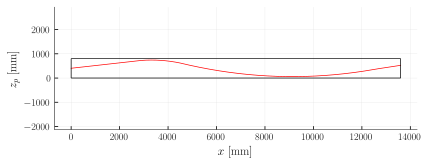

In [22]:
# | label: fig-z_p_von_x
# | fig-cap: "Geometrie des Spannkabels als Funktion $z_p(x)$"


x_element = np.arange(0,L.to(mm).magnitude+ l_E.to(mm).magnitude, (l_E).to(mm).magnitude)
z_p_element = z_p_lambd(x_element)

plt.plot(x_element, z_p_element, color='red')
plt.axis('equal')

plt.hlines(800,0,max(x_element), color = 'black')
plt.hlines(0,0,max(x_element), color = 'black')

plt.vlines(0,0,800, color='black')
plt.vlines(max(x_element),0,800, color='black')

plt.xlabel('$x$ [mm]')
plt.ylabel('$z_p$ [mm]')
plt.show()



Unter Berücksichtigung der folgenden Gleichung können abschliessend die Umlenkkräfte bestimmt werden.

$$
u_p(x) \simeq z_p(x)'' \cdot P
$$

Dargestellt sind die Umlenkkräfte in der @fig-u_p_von_x.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


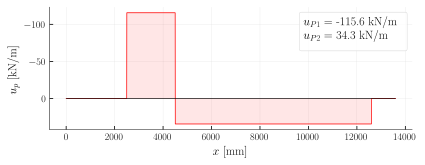

In [23]:
# | label: fig-u_p_von_x
# | fig-cap: "Umlenkkräfte ermittelt mit $z_p(x)''$"

x_plot = np.arange(0,L.to(mm).magnitude, (1*mm).to(mm).magnitude)


dzp_dx = z_p1_lambd(x_plot)
dzp2_dx = z_p2_lambd(x_plot)

plt.plot(x_plot, dzp2_dx*1000*P_infty.to(kN).magnitude, color='red')
plt.fill_between(x_plot, dzp2_dx*1000*P_infty.to(kN).magnitude, alpha=0.1, color='red')

plt.hlines(0,0,max(x_element), color = 'black')

plt.legend(title=f'$u_{{P1}}$ = {round(min(dzp2_dx*1000*P_infty/m),1)}\n $u_{{P2}}$ = {round(max(dzp2_dx*1000*P_infty/m),1)}')

plt.xlabel('$x$ [mm]')
plt.ylabel('$u_p$ [kN/m]')
plt.gca().invert_yaxis()
plt.show()


Darauf folgend wird die Spannstelle betrachtet. Die Exzentrizität des Spannkabels zum geometrischen Schwerpunkt des Querschnitts führt zu einem Biegemoment. Die Exzentrizität entspricht dabei:

In [24]:
exz_x = S_z.magnitude-z_p_analytical
dexz_dx =exz_x.diff(x)

exz_x_lambd =sp.lambdify(x, exz_x)
dexz_dx_lambd =sp.lambdify(x, dexz_dx)

exz_x_plot =exz_x_lambd(x_plot)
dexz_dx_plot = dexz_dx_lambd(x_plot)

In [25]:
%%render params
e_P0 = exz_x_plot[0]*mm # $x=0$
e_P1 = exz_x_plot[-1]*mm # $x=L_{tot}$


<IPython.core.display.Latex object>

Multipliziert mit der Vorspannkraft folgt das Biegemoment bei der Spannstelle links zu:

In [26]:
%%render symbolic
M_P0 = P_infty * e_P0 

<IPython.core.display.Latex object>

In [27]:
%%render params
M_P0 = M_P0.to(kN*m) # OK Zug

<IPython.core.display.Latex object>

Und bei der Spannstelle rechts zu:

In [28]:
%%render symbolic
M_P1 = P_infty * e_P1  

<IPython.core.display.Latex object>

In [29]:
%%render params
M_P1 = M_P1.to(kN*m) # UK Zug

<IPython.core.display.Latex object>

Die Querkraft resultiert aus der Neigung des Spannkabels bei der Spannstelle. Die Neigung des Kabels links entspricht dabei:

In [30]:
%%render symbolic
alpha_0 = arctan((684-404)/2500)



<IPython.core.display.Latex object>

In [31]:
%%render params 3

alpha_0

<IPython.core.display.Latex object>

Die vertikale Kompontente resultiert dabei zu:

In [32]:
%%render symbolic
P_V0 = sin(alpha_0) * P_infty

<IPython.core.display.Latex object>

In [33]:
%%render params 2
P_V0

<IPython.core.display.Latex object>

Bei der Spannstelle rechts resultiert die Kabelneigung zu:

In [34]:
%%render symbolic
alpha_1 = arctan((525-373)/1000)



<IPython.core.display.Latex object>

In [35]:
%%render params 3

alpha_1

<IPython.core.display.Latex object>

Und die vertikale Kraftkomponente beträgt dabei:

In [36]:
%%render symbolic
P_V1 = sin(alpha_1) * P_infty

<IPython.core.display.Latex object>

In [37]:
%%render params 2
P_V1

<IPython.core.display.Latex object>

In [38]:
Q_array = np.array([119, 300, 620, 700, 740, 1320, 1550, 1580, Q_max.magnitude])*kN


### Baustoffe

In [39]:
from sectionproperties.pre import Geometry

import concreteproperties.stress_strain_profile as ssp
from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_rectangular_array,
)
from concreteproperties.results import MomentCurvatureResults

from concreteproperties import EurocodeNonLinear, EurocodeParabolicUltimate



In [40]:
conc_linear_no_tension = Concrete(
    name="Beton",
    density=2.4e-6,
    stress_strain_profile=ssp.EurocodeNonLinear(
        elastic_modulus=E_c.magnitude,
        ultimate_strain=0.0035,
        compressive_strength=f_c.magnitude,
        compressive_strain=0.002,
        tensile_strength=0.001,
        tension_softening_stiffness=15e3,
    ),
    ultimate_stress_strain_profile=ssp.BilinearStressStrain(
        compressive_strength=f_c.magnitude,
        compressive_strain=0,
        ultimate_strain=0.0035,
    ),
    flexural_tensile_strength=f_cts.magnitude,
    colour="lightgrey",
)






mat_betonstahl = SteelBar(
    name="Betonstahl",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=f_sy.magnitude,
        elastic_modulus=E_s.magnitude,
        fracture_strain=epsilon_su.to(los).magnitude,
        ultimate_strength=f_st.magnitude
    ),
    colour="darkgray",
)


mat_vorspannung = SteelBar(
    name="Spannstahl",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelHardening(
        yield_strength=f_py.magnitude - sigma_P_infty.magnitude,
        elastic_modulus=E_s.magnitude,
        fracture_strain=epsilon_pu.to(los).magnitude - sigma_P_infty / E_p,
        ultimate_strength=f_pt.magnitude - sigma_P_infty.magnitude
    ),
    colour="gray",
)

In [41]:
df_beton_kennlinie = pd.read_csv(os.path.join('calcs', 'FEM' , 't6_beton.csv'), sep=',', names=['eps', 'sig']).iloc[1:,:]
df_beton_kennlinie = df_beton_kennlinie.astype(float)


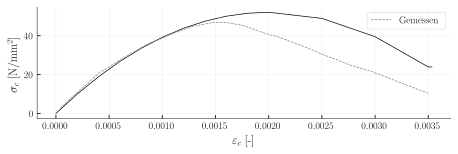

In [42]:
# | label: fig-sigma_epc_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten des Betons"


ax_sigma_eps = conc_linear_no_tension.stress_strain_profile.plot_stress_strain(render=False)

ax_sigma_eps.get_lines()[0].set_color('black')
ax_sigma_eps.get_lines()[0].set_markersize(0)

ax_sigma_eps.set_title('')
ax_sigma_eps.set_xlabel('$\\varepsilon_c$ [-]')
ax_sigma_eps.set_ylabel('$\\sigma_c$ [N/mm$^2$]')

plt.plot(df_beton_kennlinie['eps']/1000, df_beton_kennlinie['sig'], linestyle='dashed',color='gray', label='Gemessen')


plt.legend()

plt.savefig('imgs/sigma_eps_c_nonlin.svg')

plt.show()


In [43]:
df_betonstahl_kennlinie = pd.read_csv(os.path.join('calcs', 'FEM' , 't6_betonstahl.csv'), sep=',', names=['eps', 'sig']).iloc[1:,:]
df_betonstahl_kennlinie = df_betonstahl_kennlinie.astype(float)



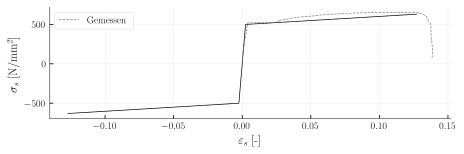

In [44]:
# | label: fig-sigma_eps_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten des Betonstahls"

ax_steel = mat_betonstahl.stress_strain_profile.plot_stress_strain(render = False)


ax_steel.get_lines()[0].set_color('black')
ax_steel.get_lines()[0].set_markersize(0)


ax_steel.set_title('')
ax_steel.set_xlabel('$\\varepsilon_s$ [-]')
ax_steel.set_ylabel('$\\sigma_s$ [N/mm$^2$]')

plt.plot(df_betonstahl_kennlinie['eps'], df_betonstahl_kennlinie['sig'], linestyle='dashed',color='gray', label='Gemessen')
plt.legend()

plt.show()

Die entsprechende Spannungs-Dehnungs-Beziehung ist in @fig-sigma_eps_t6 gezeigt. Als Annahme gilt, dass die Stäbe lediglich unter Zug belastet werden. Die Druckbewehrung wird bei der Bestimmung der Momenten-Krümmungs-Beziehung vernachlässigt. Das Verhalten wird mit einem Bilinearem Verhalten approximiert.

Die Spannungs-Dehnungs-Beziehung des Spannstahls wird mit der Vorspannspannung $\sigma_{P\infty}$ reduziert.

In [45]:
df_spannstahl_kennlinie = pd.read_csv(os.path.join('calcs', 'FEM' , 't6_spannstahl.csv'), sep=',', names=['eps', 'sig']).iloc[1:,:]
df_spannstahl_kennlinie = df_spannstahl_kennlinie.astype(float)
df_spannstahl_kennlinie['sig'] = df_spannstahl_kennlinie['sig'] - sigma_P_infty.magnitude
df_spannstahl_kennlinie = df_spannstahl_kennlinie[(df_spannstahl_kennlinie > 0).all(1)]


df_spannstahl_kennlinie['eps'] = df_spannstahl_kennlinie['eps'] - df_spannstahl_kennlinie['eps'].iloc[0]



c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\numpy\core\shape_base.py:65: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ary = asanyarray(ary)


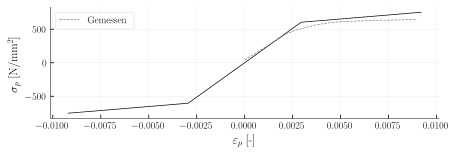

In [46]:
# | label: fig-sigma_eps_vorspannung_t6
# | fig-cap: "Spannungs-Dehnungs-Verhalten der Vorspannung"

ax_steel = mat_vorspannung.stress_strain_profile.plot_stress_strain(render = False)



ax_steel.get_lines()[0].set_color('black')
ax_steel.get_lines()[0].set_markersize(0)



ax_steel.set_title('')
ax_steel.set_xlabel('$\\varepsilon_p$ [-]')
ax_steel.set_ylabel('$\\sigma_p$ [N/mm$^2$]')



plt.plot(df_spannstahl_kennlinie['eps']/10, df_spannstahl_kennlinie['sig'], linestyle='dashed',color='gray', label='Gemessen')
plt.legend()


plt.show()

### Momenten-Krümmungs-Beziehung

Die Momenten-Krümmungs-Beziehung zeigt bei diesem Versuch eine gewisse Komplexität. Grundsätzlich gilt es für jede Abstufung der Bewehrung eine separate Momenten-Krümmungs-Beziehung herzuleiten. 

Wird bei der Vorspannung Spannkraftverluste berücksichtigt, so wirkt der Restquerschnitt des Spannstahls als schlaffe Bewehrung bei Belastung mit. Dies hat Einfluss auf das Momenten-Krümmungs-Verhalten. Durch die parabolische Geometrie des Spannkabels, gilt es die Momenten-Krümmungs-Beziehung unter Variation der Spannkabellage zu definieren, was die Komplexität der Momenten-Krümmungs-Beziehung erhöht.

Um den Rechenaufwand gering zu halten wird lediglich ein qualitatives Verhalten der Momenten-Krümmungs-Beziehung angestrebt. Dabei wird der Querschnitt beim Fliessen der Zugbewehrung betrachtet, sowie wird der Biegewiderstand bestimmt. Diese Punkte werden linear mit einander verbunden. Des Weiteren wird die Druckbewehrung stehts vernachlässigt.

#### Abschätzung
Hier wird die Krümmung und das Biegemoment für den Querschnitt A-A abgeschätzt, als Referenzwerte für die numerisch erstellten Momenten-Krümmungs-Diagramme. Die Bewehrungsführung wird dabei vereinfacht, schematisch für negative Biegung gezeigt in der @fig-t6_qs_approx.

![Vereinfachung der Bewehrungsführung, Druckbewehrung vernachlässigt, Zugbewehrung zu einem Stab zusammengefasst](../imgs/T6_qs_approx.svg){#fig-t6_qs_approx}


##### Negative Momente - Zug im Obergurt

Es wird der Biegewiderstand betrachtet, unter der Prämisse dass der Beton vollständig plastifiziert, sowie die Bewehrung die Zugfestigkeit erreicht. Somit ist dieser Zustand als Grenzzustand zu betrachten. Sind die numerischen Ergebnisse, dargestellt im Anhang, kleiner oder gleich diesem Widerstand, so ist das Ergebnis zufriedenstellend.

![Erreichen des Biegewiderstands, Betondruckzone vollständig plastifiziert, Bewehrung erreicht Zugfestigkeit](../imgs/T6_qs_MR.svg){#fig-t6_qs_MR}

Die Querschnittsfläche der schlaffen Bewehrung:

In [47]:
%%render symbolic

A_s_1 = (4*(14*mm)**2 /4 + 12 *(12*mm)**2 /4)*pi

<IPython.core.display.Latex object>

In [48]:
%%render params
A_s_1

<IPython.core.display.Latex object>

Die statische Höhe wird abgeschätzt und beträgt:

In [49]:
%%render symbolic

d_1 = h - h_5/2



<IPython.core.display.Latex object>

In [50]:
%%render params

d_1


<IPython.core.display.Latex object>

In [51]:
# sum_Fx = sp.sympify("F_s - P_infty - F_c")
# sum_My = sp.sympify("F_s * (d-S_z) + F_c * (S_z-0.425*x)")
# def_Fc = sp.sympify("0.85*x*f_c*b_w-F_c")
# def_Fs = sp.sympify("A_s_1 * f_st- F_s")

Mittels horizontalem Gleichgewicht der Kräfte lässt sich die Druckzonenhöhe bestimmen:

In [52]:
%%render symbolic

x_1 = (A_s_1 *f_st + A_p * (f_pt-sigma_P_infty) + P_infty) / (b_inf*0.85*f_c)



<IPython.core.display.Latex object>

In [53]:
%%render params
x_1 =x_1.to(mm)

<IPython.core.display.Latex object>

Mit welcher der Biegewiderstand ermittelt werden kann.

In [54]:
%%render symbolic 

M_R1 = (A_s_1 * f_sy  + A_p * (f_py - sigma_P_infty)) * (d_1 - S_z)  + 0.85*b_inf*f_c*x_1*(S_z-0.425*x_1)


<IPython.core.display.Latex object>

In [55]:
%%render params
M_R1 = (float(M_R1.magnitude)*N*mm).to(kN*m)

<IPython.core.display.Latex object>

Die Krümmung wird dabei ebenfalls abgeschätzt. Es wird vorausgesetzt, dass die Vorspannung zuerst versagt, da die Bruchdehnung deutlich kleiner ist:

In [56]:
%%render symbolic

chi_1 = (epsilon_pu - sigma_P_infty / E_p) / (d_1 - x_1)

<IPython.core.display.Latex object>

In [57]:
%%render 4 params

chi_1 = chi_1.to(1/m)

<IPython.core.display.Latex object>

##### Positive Biegemomente - Zug im Untergurt

Das gleiche Vorgehen wird für positive Biegebeanspruchung angewendet.


![Erreichen des Biegewiderstands, Betondruckzone vollständig plastifiziert, Bewehrung erreicht Zugfestigkeit](../imgs/T6_qs_MR_neg.svg){#fig-t6_qs_MR_pos}

Die Querschnittsfläche der Bewehrung beträgt:

In [58]:
%%render symbolic

A_s_2 = 8*(14*mm)**2 / 4 *pi

<IPython.core.display.Latex object>

In [59]:
%%render params

A_s_2

<IPython.core.display.Latex object>

Die abgeschätzte statische Höhe:

In [60]:
%%render symbolic

d_2 = h - h_1 / 2.5

<IPython.core.display.Latex object>

In [61]:
%%render params

d_2

<IPython.core.display.Latex object>

Mit horizontalem Gleichgewicht der Kräfte folgt die Druckzonenhöhe zu:

In [62]:
%%render symbolic

x_2 = (A_s_2 *f_st + P_infty) / (b_sup*0.85*f_c)



<IPython.core.display.Latex object>

In [63]:
%%render params

x_2 = x_2.to(mm)

<IPython.core.display.Latex object>

In [64]:
%%render symbolic 

M_R2 = A_s_2 * f_sy * (d_2 - S_z)  + 0.85*b_sup*f_c*x_2*(S_z-0.425*x_2)


<IPython.core.display.Latex object>

In [65]:
%%render params
M_R2 = (float(M_R2.magnitude)*N*mm).to(kN*m)

<IPython.core.display.Latex object>

Es wird von einem Betonversagen ausgegangen, da keine Vorspannung unter zug ist und die schlaffe bewehrung eine enorm hohe Bruchdehnung aufweist.

In [66]:
%%render symbolic

chi_2 = (epsilon_cu) / x_2

<IPython.core.display.Latex object>

In [67]:
%%render 4 params

chi_2 = chi_2.to(1/m)

<IPython.core.display.Latex object>

Vergleichbar mit 

<!-- ![Querschnitt an der Stelle A-A verglichen mit @fig-bewehrung_laengs_t6](T6_m_chi/qs_35.svg){#fig-qs_a_a} -->


In [68]:
import glob
import pandas as pd

folder_path = 'docs/T6_m_chi'
file_paths = glob.glob(f'{folder_path}/*.csv')
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, names=['chi', 'M_y'], sep=';')
    filename = file_path.split('/')[-1]  # Extract the filename from the file path
    df.columns.name = filename  # Set the column name as the filename    
    dfs.append(df)


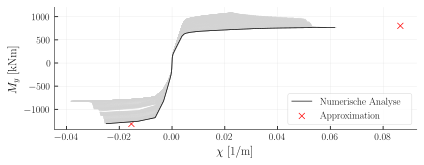

In [69]:
# | label: fig-m_chi_schaetzung
# | fig-cap: "Momenten-Krümmungs-Beziehung numerisch gelöst, dazu grobe Abschätzung der Grenzpunkte aufgezeigt"


m_chi_qs35 = pd.read_csv(os.path.join('docs','T6_m_chi','M_Chi_qs35.csv'),sep=';', names=['chi', 'M_y'])

for iter in dfs:
    plt.plot(iter['chi'], iter['M_y'], color='lightgray')
plt.plot(m_chi_qs35['chi'], m_chi_qs35['M_y'], color='black', label='Numerische Analyse')
plt.scatter(np.array([-chi_1.magnitude, chi_2.magnitude]), np.array([-M_R1.magnitude, M_R2.magnitude]), color='red', marker='x', label='Approximation')

plt.legend()
plt.xlabel('$\\chi$ [1/m]')
plt.ylabel('$M_y$ [kNm]')
plt.show()

In [70]:

points_qs = [
             (200,0),
             (600,0),
             (600, 180),
             (600-90, 180+50),
             (600-90, 180+50+400),
             (800, 180+50+400+30),
             (800, 800),
             (0,800),
             (0,800-140),
             (200 + 90, 800-140-30),
             (200+90, 180+50),
             (200, 180),
            ]


facets_qs = [
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (8,9),
    (9,10),
    (10,11),
    (11,0),
]
control_pts_qs = [(400,200)]

beam = Geometry.from_points(
    points=points_qs,
    facets=facets_qs,
    control_points=control_pts_qs
)


In [71]:
def m_chi_var(z_prestress=700, dA=14, dB=14, dC=12, dD = 12, dE = 12, dF = 12 , dG = 14, dH = 14, dI = 14):

    # Define the section

    s_top_horiz = 90

    bars_A = add_bar_rectangular_array(geometry=beam, 
                            area=dA**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=140+30-60,
                            anchor=(200+90+30,800-30),
                            n=4,
                            )

    bars_B = add_bar_rectangular_array(geometry=bars_A, 
                            area=dB**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=140+30-60,
                            anchor=(200+90+30,800-170+30),
                            n=4,
                            )

    bars_C = add_bar_rectangular_array(geometry=bars_B, 
                            area=dC**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400-60,
                            n_y=2,
                            y_s=140+30-60-30/290 * s_top_horiz,
                            anchor=(200+30,800-170+30/290*s_top_horiz+30),
                            n=4,
                            )

    bars_D = add_bar_rectangular_array(geometry=bars_C, 
                            area=dD**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400+s_top_horiz*2-60,
                            n_y=2,
                            y_s=140+30-60-30/290 * 2*s_top_horiz,
                            anchor=(200-90+30,800-170+30/290*2*s_top_horiz+30),
                            n=4,
                            )

    bars_E = add_bar_rectangular_array(geometry=bars_D, 
                            area=dE**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400+4*s_top_horiz-60,
                            n_y=2,
                            y_s=140+30-60-30/290 * 3*s_top_horiz,
                            anchor=(200-2*s_top_horiz+30,800-170+30/290*3*s_top_horiz+30),
                            n=4,
                            )

    bars_F = add_bar_rectangular_array(geometry=bars_E, 
                            area=dF**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=2,
                            y_s=150,
                            anchor=(200+90+30,400-75),
                            n=4,
                            )

    bars_G = add_bar_rectangular_array(geometry=bars_F, 
                            area=dG**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=400-60,
                            n_y=2,
                            y_s=180-60,
                            anchor=(200+30,30),
                            n=4,
                            )

    bars_H = add_bar_rectangular_array(geometry=bars_G, 
                            area=dH**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=150,
                            anchor=(200+90+30,180+10),
                            n=4,
                            )

    bars_I = add_bar_rectangular_array(geometry=bars_H, 
                            area=dI**2 / 4 *3.14, 
                            material=mat_betonstahl,
                            n_x=2,
                            x_s=220-60,
                            n_y=1,
                            y_s=180-60,
                            anchor=(200+90+30,30),
                            n=4,
                            )

    prestress = add_bar_rectangular_array(geometry=bars_I, 
                            area=A_p.magnitude, 
                            material=mat_vorspannung,
                            n_x=1,
                            x_s=0,
                            n_y=1,
                            y_s=0,
                            anchor=(400,z_prestress),
                            n=4,
                            )

    # assign concrete material to first geometry in CompoundGeometry object
    prestress.geoms[0].material = conc_linear_no_tension

    # create ConcreteSection object
    conc_sec = ConcreteSection(prestress)


    # perform moment curvature analysis and store results
    # bending about major axis so theta = pi/2
    moment_curvature_results_pos = conc_sec.moment_curvature_analysis(n=P_infty.to(N).magnitude,
        theta=0, kappa_inc=1e-7, progress_bar=False
    )

    moment_curvature_results_neg = conc_sec.moment_curvature_analysis(n=P_infty.to(N).magnitude,
        theta=0, kappa_inc=-1e-7, progress_bar=False
    )


    return moment_curvature_results_pos, moment_curvature_results_neg, conc_sec

In [72]:
A_bew_element = np.array([14,14, 10, 10])
B_bew_element = np.array([14,14, 10, 10])
C_bew_element = np.array([12,12, 10, 10])
D_bew_element = np.array([10,10,12,12, 10, 10])
E_bew_element = np.array([10,10,12,12,10, 10])
F_bew_element = np.array([10,10,10, 10])
G_bew_element = np.array([14,14,14, 14])
H_bew_element = np.array([14,14,16, 16])
I_bew_element = np.array([14,14, 16, 16])


# Abstufungen der Bewehrung deren Abstand vom Nullpunkt (links)
x_bew_var_1 = np.array([0,7150,7150, L.magnitude])
x_bew_var_2 = np.array([0,1450, 1450, 6050, 6050, L.magnitude])
x_bew_var_3 = np.array([0,8000, 8000, L.magnitude])
x_bew_var_4 = np.array([0,3400+1500, 3400+1500, L.magnitude])


# interpolate the diameter arrays so there is a value for every x_element
A_bew_element = np.interp(x_element, x_bew_var_1, A_bew_element)
B_bew_element = np.interp(x_element, x_bew_var_1, B_bew_element)
C_bew_element = np.interp(x_element, x_bew_var_1, C_bew_element)
D_bew_element = np.interp(x_element, x_bew_var_2, D_bew_element)
E_bew_element = np.interp(x_element, x_bew_var_2, E_bew_element)
F_bew_element = np.interp(x_element, x_bew_var_3, F_bew_element)
G_bew_element = np.interp(x_element, x_bew_var_4, G_bew_element)
H_bew_element = np.interp(x_element, x_bew_var_4, H_bew_element)
I_bew_element = np.interp(x_element, x_bew_var_4, I_bew_element)



In [73]:
if calc == True:
    m_chi_list = []
    for i in range(len(x_element)):
        m_chi_list.append(m_chi_var(z_p_element[i],
                                    A_bew_element[i],
                                    B_bew_element[i],
                                    C_bew_element[i],
                                    D_bew_element[i],
                                    E_bew_element[i],
                                    F_bew_element[i],
                                    G_bew_element[i],
                                    H_bew_element[i],
                                    I_bew_element[i],
                                    ))
        print(f'qs{i} fertig')

            
        
    fig3, ax3 = plt.subplots()
    for i, j in enumerate(m_chi_list):

        # MomentenKrümmungsbeziehung als .csv speichern
        m_array = np.concatenate(
            (
                np.flip(j[1].m_x),
                j[0].m_x
            ),axis=0
        )
        chi_array = np.concatenate(
            (
                np.flip(j[1].kappa),
                j[0].kappa
            ),
            axis=0
        )
        # Momenten-Krümmungs-Beziehung
        tot_array = np.array([chi_array*10**3, m_array/10**6]).transpose()
        np.savetxt(f"docs/T6_m_chi/M_Chi_qs{i}.csv",
                tot_array,
                delimiter = ";"
                )
        
        # Momenten-Verdrehungs-Beziehung
        ## Die maximale Verdrehung wird bestimmt um ein horizontales Verhalten im Diagramm zu generieren
        phi_min = min(chi_array*10**3*l_E.to(m).magnitude)*1.1
        phi_max = max(chi_array*10**3*l_E.to(m).magnitude)*1.1

        m_min = min(m_array/10**6)
        m_max = max(m_array/10**6)

        m_phi_array = m_array/10**6
        m_phi_array = np.insert(m_phi_array, 0, m_min)
        m_phi_array = np.append(m_phi_array, m_max)

        phi_array = chi_array*10**3*l_E.to(m).magnitude
        phi_array = np.insert(phi_array, 0, phi_min)
        phi_array = np.append(phi_array, phi_max)

        tot_array = np.array([phi_array, m_phi_array]).transpose()
        np.savetxt(f"docs/T6_m_chi/M_Phi/M_Phi_qs{i}.csv",
                tot_array,
                delimiter = ";"
                )
        
        
        # Create the plots to control



        attribute_text = f"""$x = {x_element[i]}$ mm 
            \t $z_p = {z_p_element[i]}$ mm 
            \t $\oslash_A = {A_bew_element[i]}$ mm
            \t $\oslash_B = {B_bew_element[i]}$ mm
            \t $\oslash_C = {C_bew_element[i]}$ mm
            \t $\oslash_D = {D_bew_element[i]}$ mm
            \t $\oslash_E = {E_bew_element[i]}$ mm
            \t $\oslash_F = {F_bew_element[i]}$ mm
            \t $\oslash_G = {G_bew_element[i]}$ mm
            \t $\oslash_H = {H_bew_element[i]}$ mm
            \t $\oslash_I = {I_bew_element[i]}$ mm"""



        ax_qs = j[2].plot_section(title='', filename=f'docs/T6_m_chi/qs_{i}.svg')




        fig2, ax = plt.subplots()
        ax.plot(np.array(chi_array)*1000, np.array(m_array)/10**6, color='black')
        ax.set_xlabel('$\chi$ [1/m]')
        ax.set_ylabel('$M_y$ [kNm]')
        ax.text(s=attribute_text, x=np.min(np.array(chi_array)*1000), y=min(np.array(m_array)/10**6)*0.8,fontsize=9,
                verticalalignment='bottom', horizontalalignment='left')
        fig2.savefig(f'docs/T6_m_chi/m_chi_{i}.svg')


        # Überlagerungsplot
        ax3.plot(np.array(chi_array)*1000, np.array(m_array)/10**6, color='lightgray')
        ax3.set_xlabel('$\chi$ [1/m]')
        ax3.set_ylabel('$M_y$ [kNm]')

    fig3.savefig(f'docs/T6_m_chi/m_chi_tot.svg')
    plt.close('all')
                                        

## Versuchsresultate

Abgeschlossen wir der Versuch mit dem Vergleich der gemessenen Verformungen mit den numerisch ermittelten Verformungen. Dazu wird das Last-Verformungs-Verhalten für die Einzellast $P$ und die Messstelle $w_{10}$ für die Nachrechnung und die Messung aufgezeigt. Dies ist in der @fig-p_w10_vergleich dargestellt. Die Nachrechnung ist in etwa deckungsgleich mit den Messwerten bis zum Erreichen der Höchstlast. Das Plateau im Plot wird mit der Nachrechnung nicht getroffen. Betrachtet man die Belastungsgeschichte des Trägers gemäss dem Versuchsbeschrieb, so wurde die Einzellast beim Erreichen der höchstlast konstant gehalten. Das numerische Modell zeigt, dass bei $P_{max}$ der negative Biegewiderstand in etwa erreicht wurde. Dies bedeutet, dass sich bei einer Steigerung der Last rechnerisch ein plastisches Gelenk ausbildet, folglich sich ein Mechanismus einstellt beim Kragarm. Es lässt sich Vermuten dass dieses Verhalten bei der Messung aufgezeichnet wurde. Die Verformungsfigur bestätigt diese Vermutung. Dazu gilt es zu erwähnen, dass dich Last im Versuch keineswegs absolut konstant gehalten werden kann. Kleine Schwankungen der Last bei einem enorm weichen Verhalten liefern möglicherweise die gemessenen Verformungen. Mit den gewählten vereinfachten bilinearen Spannungs-Dehnungs-Beziehungen des Betonstahls und des Spannstahls wird jedoch eine solche Präzision nicht angestrebt. Folglich ist das Resultat zufriedenstellend, dass die Verformungen bis zum Erreichen der Höchstlast nachgerechnet werden konnten.

In [74]:
P_array = np.array([0,173, 195, 380, 440, 471, 485, 490, 490, 512 ])*kN
w_10_array = np.array([0.8,6.1, 5.7, 31.5, 41.7, 50.1, 49.7,50,79.2,79.1])*mm


Q_array = np.array([0,119,300, 620,705,745,1320,1540,1570,1693])*kN
q_array = Q_array / L_q
w_18_array = np.array([0,1.25,0.6,0.4,0.2,0.1,24.2,56.1,95.6,176.5])*mm

In [75]:
DF_LS8 = pd.read_excel(os.path.join('calcs','FEM','RFEM','T6_1D_LS8.xlsx')).drop(index=0)
DF_LS8


DF_LS8.loc[-1] = [0,0,0,1.1,0]  # adding a row
DF_LS8.index = DF_LS8.index + 1  # shifting index
DF_LS8 = DF_LS8.sort_index()  # sorting by index


DF_LS12 = pd.read_excel(os.path.join('calcs','FEM','RFEM','T6_1D_LS12.xlsx')).drop(index=0)


c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


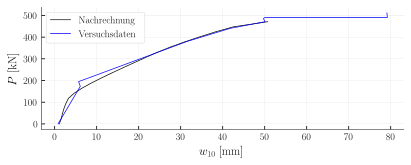

In [76]:
# | label: fig-p_w10_vergleich
# | fig-cap: "Vergleich der Versuchsresultate mit den numerisch ermittelten Resultate, dargestellt im Last-Verformungs-Diagramm an der Stelle $10$"


plt.plot(DF_LS8['Horizontale Achse'],DF_LS8['Lastfaktor']*P_LS8.magnitude, color='black', label='Nachrechnung')
plt.plot(w_10_array, P_array, label='Versuchsdaten', color='blue')
plt.xlabel('$w_{{10}}$ [mm]')
plt.ylabel('$P$ [kN]')
plt.legend()
plt.show()

In [77]:
Q_calc_LS12 = np.array(DF_LS12['Lastfaktor']*((Q_LS12-Q_LS8).magnitude) + Q_LS8.magnitude, dtype=float)
Q_calc_LS12 = sorted(np.append(Q_calc_LS12, 0))


w_calc_LS12 = np.array(DF_LS12['Horizontale Achse'], dtype=float)
w_calc_LS12 = sorted(np.append(w_calc_LS12, 0))

Der Vergleich der Last-Verformungs-Kurve für die Stelle $w_{10}$ zeigt ähnliche charakteristik wie diese des Kragarms. Bis zu einer Last von ca. $700$ kN zeigt sich keine Verformung. Dabei gilt es zu erwähnen, dass sich in diesem Lastbereich der Träger in positiver $Z$-Richtung verformt aufgrund der Vorspannung und der dominierenden Einzellast am Kragarm. Diese Verformungen sind mit den Wegaufnehmern bei Versuch nicht aufgenommen worden. Der raue knick bei den Versuchsdaten resultiert aus der punktuellen Messung der Verformung bei zwei weit auseinander liegenden Laststufen. Sprich aus der mangelnden Auflösung der Messung. Auch hier beschreibt die Nachrechnung das Verhalten zufriedenstellend. Im Bereich der Höchstlast weicht die Präzision deutlich ab. Trotzdem wurde das Verformungsverhalten bis zu dieser Stufe getroffen.

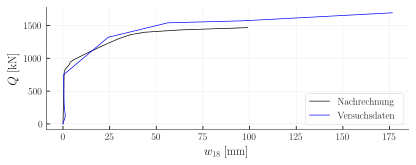

In [78]:
# | label: fig-Q_w18_vergleich
# | fig-cap: "Vergleich der Versuchsresultate mit den numerisch ermittelten Resultate, dargestellt im Last-Verformungs-Diagramm an der Stelle $18$"



plt.plot(w_calc_LS12,Q_calc_LS12, color='black', label='Nachrechnung')
plt.plot(w_18_array, Q_array, label='Versuchsdaten', color='blue')
plt.xlabel('$w_{{18}}$ [mm]')
plt.ylabel('$Q$ [kN]')
plt.legend()
plt.show()

In [79]:
DF_LS8_kin = pd.read_excel(os.path.join('calcs','FEM','RFEM','T6_1D_LS8_kin.xlsx')).drop(index=0).iloc[:-2, [0,1,6]]
DF_LS8_kin = DF_LS8_kin.astype(float)

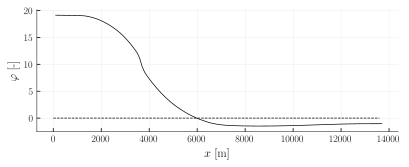

In [80]:
# | label: fig-phi-max-t6_l8
# | fig-cap: "Verdrehungsverlauf aus dem Federmodell für die Laststufe 8 für den Träger T6"




plt.plot(DF_LS8_kin.iloc[:,0]*100, DF_LS8_kin.iloc[:,2], color='black')
plt.plot(x_element, np.zeros(x_element.shape), color="black", linestyle="dashed")

plt.xlabel("$x$ [m]")
plt.ylabel("$\\varphi$ [-]")

plt.show()


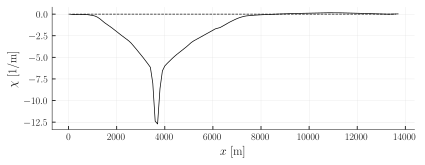

In [81]:
# | label: fig-chi-max-t6l8
# | fig-cap: "Berechneter Krümmungsverlauf aus dem Verdrehungsverlauf für die Laststufe 8 für den Träger T6"


chi_t6 = np.gradient(DF_LS8_kin.iloc[:,2], 0.1)
plt.plot(x_element, np.zeros(x_element.shape), color="black", linestyle="dashed")

plt.plot(DF_LS8_kin.iloc[:,0]*100, chi_t6, color='black')

plt.ylabel("$\\chi$ [1/m]")
plt.xlabel("$x$ [m]")
plt.savefig("imgs/kruemmungsverlauf_T6_LS8_axis.svg")
plt.show()

In [82]:
DF_LS12_kin = pd.read_excel(os.path.join('calcs','FEM','RFEM','T6_1D_LS12_kin.xlsx')).drop(index=0).iloc[:-2, [0,1,6]]
DF_LS12_kin = DF_LS12_kin.astype(float)




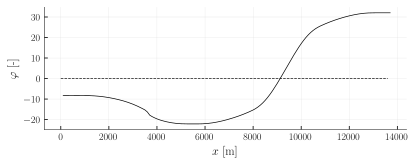

In [83]:
# | label: fig-phi-t6_l12
# | fig-cap: "Verdrehungsverlauf aus dem Federmodell für die Laststufe 12 für den Träger T6"




plt.plot(DF_LS12_kin.iloc[:,0]*100, DF_LS12_kin.iloc[:,2], color='black')
plt.plot(x_element, np.zeros(x_element.shape), color="black", linestyle="dashed")

plt.xlabel("$x$ [m]")
plt.ylabel("$\\varphi$ [-]")

plt.show()

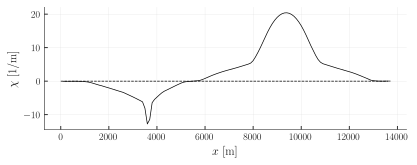

In [84]:
# | label: fig-chi-max-t6l12
# | fig-cap: "Berechneter Krümmungsverlauf aus dem Verdrehungsverlauf für die Laststufe 12 für den Träger T6"


chi_t6_ls12 = np.gradient(DF_LS12_kin.iloc[:,2], 0.1)
plt.plot(x_element, np.zeros(x_element.shape), color="black", linestyle="dashed")

plt.plot(DF_LS12_kin.iloc[:,0]*100, chi_t6_ls12, color='black')

plt.ylabel("$\\chi$ [1/m]")
plt.xlabel("$x$ [m]")
plt.savefig("imgs/kruemmungsverlauf_T6_LS12_axis.svg")
plt.show()

## IdeaStatica

In diesem Kapitel wird darauf abgezielt, das Verformungsverhalten der behandelten Versuche mit einer kommerziellen Software zu bestimmen. Das Ziel ist es die Resultate der Software auf Präzision zu prüfen, sowie die Eingabe des Modells zu verstehen.

Dabei wird die Modellaufbereitung beschrieben, sowie einzelne Eingabeparameter diskutiert. Der Berechnungsalgorithmus, bzw. die Finite-Element-Analyse wird grob umschrieben.


### Analyse

Der Grundgedanke des Lösungsalgorithmus ist in fig-algorithm aufgezeigt. Es lassen sich Systeme im ebenen Spannungszustand modellieren. Dabei werden Betonelemente in Zweidimensionale Elemente unterteilt. Die Bewehrungsstäbe bestehen aus Eindimensionalen Elementen, welche lediglich Kräfte in Stablängsrichtung aufnehmen. 


![Qualitative Netzeinteilung des Trägers](../imgs/T6_ideastatica.svg){#fig-netzeinteilung}


Verknüpft werden die Elemente über weine Wechselbeziehung, welche die Dehnungen an den Betonknoten auf den Bewehrungsstab übertragen. Anhand der Dehnung kann die Spannung entsprechend der Spannungs-Dehnungs-Beziehung ermittelt werden. Es ist auch deutlich zu erkennen dass dieser Ansatz sensibel auf die gewählte Netzteilung reagiert.

![Ausgeschnittenes Netzelement mit zweidimensionalen Betonelementen und eindimensionalen Stäben, rechts zeigt die Knoten der Betonflächen mit Wechselbeziehung zu den Stabknoten](../imgs/T6_fem_elemente.svg){#fig-fem_element}

![Ausgeschnittenes Netzelement mit zweidimensionalen Betonelementen mit qualitativem Dehnungsverlauf linear interpoliert](../imgs/T6_fem_werkstoffe.svg){#fig-fem_werkstoff}




### Ergebnisse

In [85]:
last_verformung_feld =  pd.read_csv(os.path.join('calcs', 'FEM', 'IDEAstatica', 'feld.csv'), sep=';', names=['percent','deform', '-']).iloc[11:,:2]
last_verformung_feld  = last_verformung_feld.astype(float)
last_verformung_feld['deform'] = last_verformung_feld['deform']*-1


last_verformung_feld['Q'] = (last_verformung_feld['percent'] - 200)/100*105*9+80*9 
df_null = pd.DataFrame([[0.,0., 0.]], columns=last_verformung_feld.columns)

last_verformung_feld = pd.concat([last_verformung_feld, df_null], axis=0).sort_values("deform").reset_index()


In [86]:
last_verformung_kragarm =  pd.read_csv(os.path.join('calcs', 'FEM', 'IDEAstatica', 'kragarm.csv'), sep=';', names=['percent','deform', '-']).iloc[6:,:2]
last_verformung_kragarm  = last_verformung_kragarm.astype(float)
last_verformung_kragarm['deform'] = last_verformung_kragarm['deform']*-1
last_verformung_kragarm['P'] = (last_verformung_kragarm['percent']-100)/100*475


c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


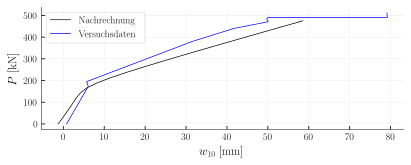

In [87]:
# | label: fig-p_w10_vergleich_idea
# | fig-cap: "Vergleich der Versuchsresultate mit den numerisch ermittelten Resultate aus IDEAStatiCa, dargestellt im Last-Verformungs-Diagramm an der Stelle $10$"


plt.plot(last_verformung_kragarm['deform'],last_verformung_kragarm['P'], color='black', label='Nachrechnung')
plt.plot(w_10_array, P_array, label='Versuchsdaten', color='blue')
plt.xlabel('$w_{{10}}$ [mm]')
plt.ylabel('$P$ [kN]')
plt.legend()
plt.show()

Resultate etwas weicher da Scheibenelemente auch Verschiebungen lateral zur Längsachse berücksichtigen.

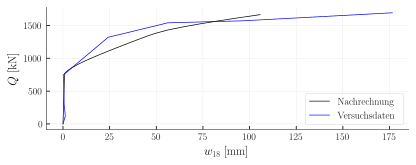

In [88]:
# | label: fig-Q_w18_vergleich_idea
# | fig-cap: "Vergleich der Versuchsresultate mit den numerisch ermittelten Resultate aus IDEAStatiCa, dargestellt im Last-Verformungs-Diagramm an der Stelle $18$"

plt.plot(last_verformung_feld['deform'], last_verformung_feld['Q'], label='Nachrechnung', color='black')
plt.plot(w_18_array, Q_array, label='Versuchsdaten', color='blue')
plt.xlabel('$w_{{18}}$ [mm]')
plt.ylabel('$Q$ [kN]')
plt.legend()
plt.show()